# 1. Gathering taxonomic journals

We gathered taxonomic journals through three sources:
 - We used Wikidata to find all academic or scientific journals with a main subject or field of work related to taxonomy, phylogeny, nomenclature,...
 - We used Wikidata to find all journals that had an IPNI or ZooBank publication ID.
 - We used the OpenAlex API to retrieve all journals that were related to "taxonomy", i.e. with the concept "taxonomy" linked to it.

Here, we take a quick look at the results.

In [1]:
import pandas as pd
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

In [2]:
journals = pd.read_csv("../data/processed/journals.csv")
journals

,title,wikidataURL,ISSN-L,IPNIpubID,ZooBankPubID,openAlexID,dissolvedYear,dissolved,source
0,ZooKeys,http://www.wikidata.org/entity/Q219980,1313-2970,NaN,91BD42D4-90F1-4B45-9350-EEF175B1727A,S199213172,NaN,NaN,Wikidata taxonomic subject
1,ZooKeys,http://www.wikidata.org/entity/Q219980,1313-2970,NaN,91BD42D4-90F1-4B45-9350-EEF175B1727A,S199213172,NaN,NaN,Wikidata taxonomic subject
2,Acta Phytotaxonomica et Geobotanica,http://www.wikidata.org/entity/Q5656888,1346-7565,1097-2,NaN,NaN,NaN,NaN,Wikidata taxonomic subject
3,Acta Phytotaxonomica et Geobotanica,http://www.wikidata.org/entity/Q5656888,1346-7565,1097-2,NaN,NaN,NaN,NaN,Wikidata taxonomic subject
4,Willdenowia,http://www.wikidata.org/entity/Q2675951,0511-9618,3087-2,NaN,S107729305,NaN,NaN,Wikidata taxonomic subject
...,...,...,...,...,...,...,...,...,...
3321,Advances in Evolutionary Biology,http://www.wikidata.org/entity/Q27726196,2314-7660,NaN,NaN,S4210228732,2015,False,OpenAlex taxonomy concept
3322,Sternbergiana,NaN,2695-1118,NaN,NaN,S4210236945,2021,False,OpenAlex taxonomy concept
3323,World Transactions on Engineering and Technolo...,http://www.wikidata.org/entity/Q15756897,1446-2257,NaN,NaN,S4306534958,2017,False,OpenAlex taxonomy concept
3324,Clinical allergy and immunology,NaN,1075-7910,NaN,NaN,S2764391547,NaN,NaN,OpenAlex taxonomy concept


In [3]:
# number of journals per source
journals["source"].value_counts()

source
IPNI or ZooBank ID            3075
OpenAlex taxonomy concept      171
Wikidata taxonomic subject      80
Name: count, dtype: int64

In [4]:
print("Number of unique journals (by title): " +
      str(len(journals.drop_duplicates(subset="title", ignore_index=True))))

Number of unique journals (by title): 2317


In [5]:
ipnizoo = set(journals[journals["source"]=="IPNI or ZooBank ID"]["title"])
openalex = set(journals[journals["source"]=="OpenAlex taxonomy concept"]["title"])
wikisubjects = set(journals[journals["source"]=="Wikidata taxonomic subject"]["title"])

In [6]:
print("Number of journals found via IPNI or ZooBank ID, not found via OpenAlex: " +
      str(len(ipnizoo - openalex)))
print("Number of journals found via IPNI or ZooBank ID, not found via Wikidata subjects: " +
      str(len(ipnizoo - wikisubjects)))

Number of journals found via IPNI or ZooBank ID, not found via OpenAlex: 2142
Number of journals found via IPNI or ZooBank ID, not found via Wikidata subjects: 2177


In [7]:
print("Number of journals found via Wikidata subjects, not found via OpenAlex: " +
      str(len(wikisubjects - openalex)))
print("Number of journals found via Wikidata subjects, not found via IPNI or ZooBank ID: " +
      str(len(wikisubjects - ipnizoo)))

Number of journals found via Wikidata subjects, not found via OpenAlex: 22
Number of journals found via Wikidata subjects, not found via IPNI or ZooBank ID: 8


In [8]:
print("Number of journals found via OpenAlex, not found via Wikidata subjects: " +
      str(len(openalex - wikisubjects)))
print("Number of journals found via OpenAlex subjects, not found via IPNI or ZooBank ID: " +
      str(len(openalex - ipnizoo)))

Number of journals found via OpenAlex, not found via Wikidata subjects: 156
Number of journals found via OpenAlex subjects, not found via IPNI or ZooBank ID: 107


In [9]:
print("Number of journals in common\n")
print("OpenAlex and IPNI/ZooBank IDs: " +
      str(len(openalex.intersection(ipnizoo))))
print("OpenAlex and Wikidata subjects: " +
      str(len(openalex.intersection(wikisubjects))))
print("Wikidata subjects and IPNI/ZooBank IDs: " +
      str(len(wikisubjects.intersection(ipnizoo))))
print("OpenAlex, Wikidata subjects and IPNI/ZooBank IDs: " +
      str(len(openalex.intersection(wikisubjects).intersection(ipnizoo))))

Number of journals in common

OpenAlex and IPNI/ZooBank IDs: 62
OpenAlex and Wikidata subjects: 13
Wikidata subjects and IPNI/ZooBank IDs: 27
OpenAlex, Wikidata subjects and IPNI/ZooBank IDs: 11


In [10]:
# number of journals with an OpenAlex ID per source
journals[journals["openAlexID"]==journals["openAlexID"]]["source"].value_counts()

source
IPNI or ZooBank ID            1287
OpenAlex taxonomy concept      171
Wikidata taxonomic subject      64
Name: count, dtype: int64

In [11]:
# number of journals that were not recently dissolved (or not confirmed dissolved) per source
journals[(journals["dissolved"]==False) | (journals["dissolved"]!=journals["dissolved"])]["source"].value_counts()

source
IPNI or ZooBank ID            2435
OpenAlex taxonomy concept      143
Wikidata taxonomic subject      77
Name: count, dtype: int64

Text(0.5, 1.0, 'Unique journals per source')

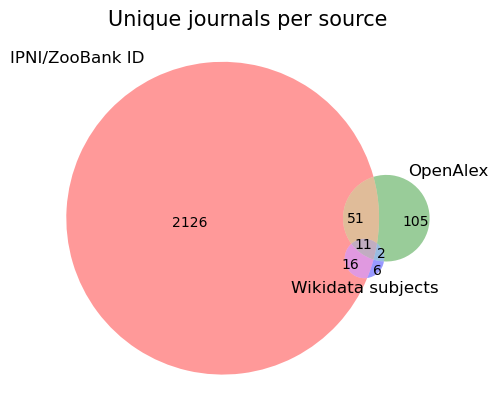

In [12]:
# venn diagram
venn3([ipnizoo, openalex, wikisubjects], ("IPNI/ZooBank ID", "OpenAlex", "Wikidata subjects"))
plt.title("Unique journals per source", fontsize=15)